In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [ ]:
Performing inner join and removing device_watts where it is "False".

In [4]:
strava_joined = strava.join(cheetah, how='inner')
strava_joined

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
2018-02-10 20:21:37+00:00,103.9,17.0,134.9,True,7.8,19,92.00 m,8,18,Ride,...,0,0,0,0,0,0,0,192.117,0.716850,15.7590
2018-02-10 20:46:02+00:00,152.1,19.0,198.9,True,31.0,49,387.00 m,21,49,Race,...,0,0,0,0,0,0,0,244.500,0.912310,69.2902
2018-02-12 21:19:36+00:00,113.3,25.0,141.4,False,25.0,631,559.00 m,12,105,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-14 20:07:12+00:00,125.3,19.0,148.9,True,47.8,143,922.00 m,6,132,Ride,...,0,0,0,0,0,0,0,222.957,0.831930,155.9740


In [5]:
strava_joined = strava_joined[strava_joined['device_watts'] == True]
strava_joined

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
2018-02-10 20:21:37+00:00,103.9,17.0,134.9,True,7.8,19,92.00 m,8,18,Ride,...,0,0,0,0,0,0,0,192.117,0.716850,15.7590
2018-02-10 20:46:02+00:00,152.1,19.0,198.9,True,31.0,49,387.00 m,21,49,Race,...,0,0,0,0,0,0,0,244.500,0.912310,69.2902
2018-02-14 20:07:12+00:00,125.3,19.0,148.9,True,47.8,143,922.00 m,6,132,Ride,...,0,0,0,0,0,0,0,222.957,0.831930,155.9740
2018-02-15 07:18:46+00:00,NaN,22.0,126.1,True,8.9,29,191.00 m,5,25,Ride,...,0,0,0,0,0,0,0,223.451,0.833770,30.7036
2018-02-16 19:19:04+00:00,124.9,20.0,159.6,True,58.6,212,659.00 m,19,132,Ride,...,0,0,0,0,0,0,0,222.469,0.830110,154.5070




Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

In [6]:
def determineskew(data):
    skew = 0
    meandata = data.mean()
    stddata = data.std()
    for i in data:
        skew += (i-meandata) * (i-meandata) * (i-meandata)
    skew = skew / ((len(data) * stddata * stddata * stddata))
    return skew

(array([41., 56., 29.,  8.,  5.,  5., 10., 31., 14.,  6.]),
 array([ 13. ,  37.1,  61.2,  85.3, 109.4, 133.5, 157.6, 181.7, 205.8,
        229.9, 254. ]),
 <a list of 10 Patch objects>)

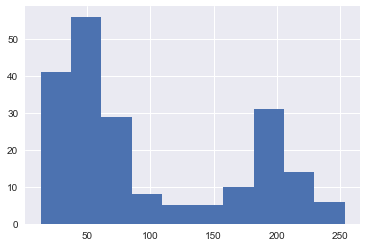

In [7]:
plt.hist(strava_joined['elapsed_time'])

In [8]:
print("Skewness of Elapsed Time: ", determineskew(strava_joined['elapsed_time']))

Skewness of Elapsed Time:  0.6293084808289977


### The histogram above shows it follows normal distribution and is positively skewed.

(array([32., 28., 47., 26., 13., 48.,  5.,  4.,  0.,  2.]),
 array([  0.  ,  10.82,  21.64,  32.46,  43.28,  54.1 ,  64.92,  75.74,
         86.56,  97.38, 108.2 ]),
 <a list of 10 Patch objects>)

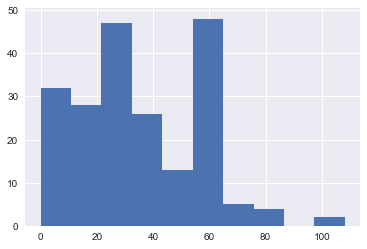

In [9]:
plt.hist(strava_joined['distance'])

In [10]:
print("Skewness of Distance : ", determineskew(strava_joined['distance']))

Skewness of Distance :  0.5057717946338387


### The histogram above shows it follows normal distribution and is positively skewed.
 

(array([ 1.,  0.,  0.,  5., 22., 69., 67., 14., 12., 15.]),
 array([ 4.7376 ,  8.09886, 11.46012, 14.82138, 18.18264, 21.5439 ,
        24.90516, 28.26642, 31.62768, 34.98894, 38.3502 ]),
 <a list of 10 Patch objects>)

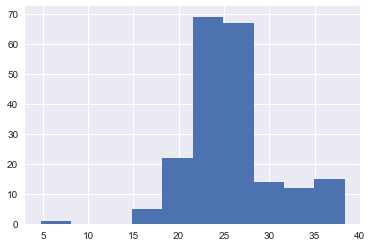

In [11]:
plt.hist(strava_joined['Average Speed'])

In [12]:
print("Skewness of Average Speed : ", determineskew(strava_joined['Average Speed']))

Skewness of Average Speed :  0.4298503404771398


### The histogram above shows it follows normal distribution and is positively skewed.


(array([11., 31., 33., 44., 26., 28., 19.,  5.,  5.,  3.]),
 array([102.872 , 119.2064, 135.5408, 151.8752, 168.2096, 184.544 ,
        200.8784, 217.2128, 233.5472, 249.8816, 266.216 ]),
 <a list of 10 Patch objects>)

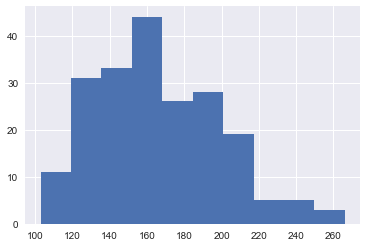

In [13]:
plt.hist(strava_joined['Average Power'])

In [14]:
print("Skewness of Average Power : ", determineskew(strava_joined['Average Power']))

Skewness of Average Power :  0.532931095763741


### The histogram above shows it follows normal distribution and is positively skewed.


(array([58., 51., 27., 30., 31.,  4.,  2.,  0.,  0.,  2.]),
 array([  7.2397 ,  47.72283,  88.20596, 128.68909, 169.17222, 209.65535,
        250.13848, 290.62161, 331.10474, 371.58787, 412.071  ]),
 <a list of 10 Patch objects>)

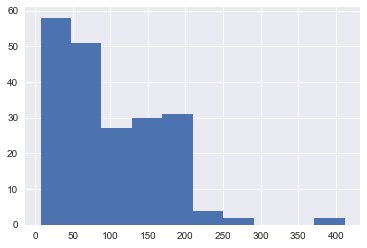

In [15]:
plt.hist(strava_joined['TSS'])

In [16]:
print("Skewness of Average TSS : ", determineskew(strava_joined['TSS']))

Skewness of Average TSS :  1.0674339961840036


### The histogram above shows it follows normal distribution and is positively skewed.




Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
* Distance
* Moving Time
* Average Speed
* Heart Rate
* Power (watts)
* Normalised power (NP)
* Training Stress Score
* Elevation Gain

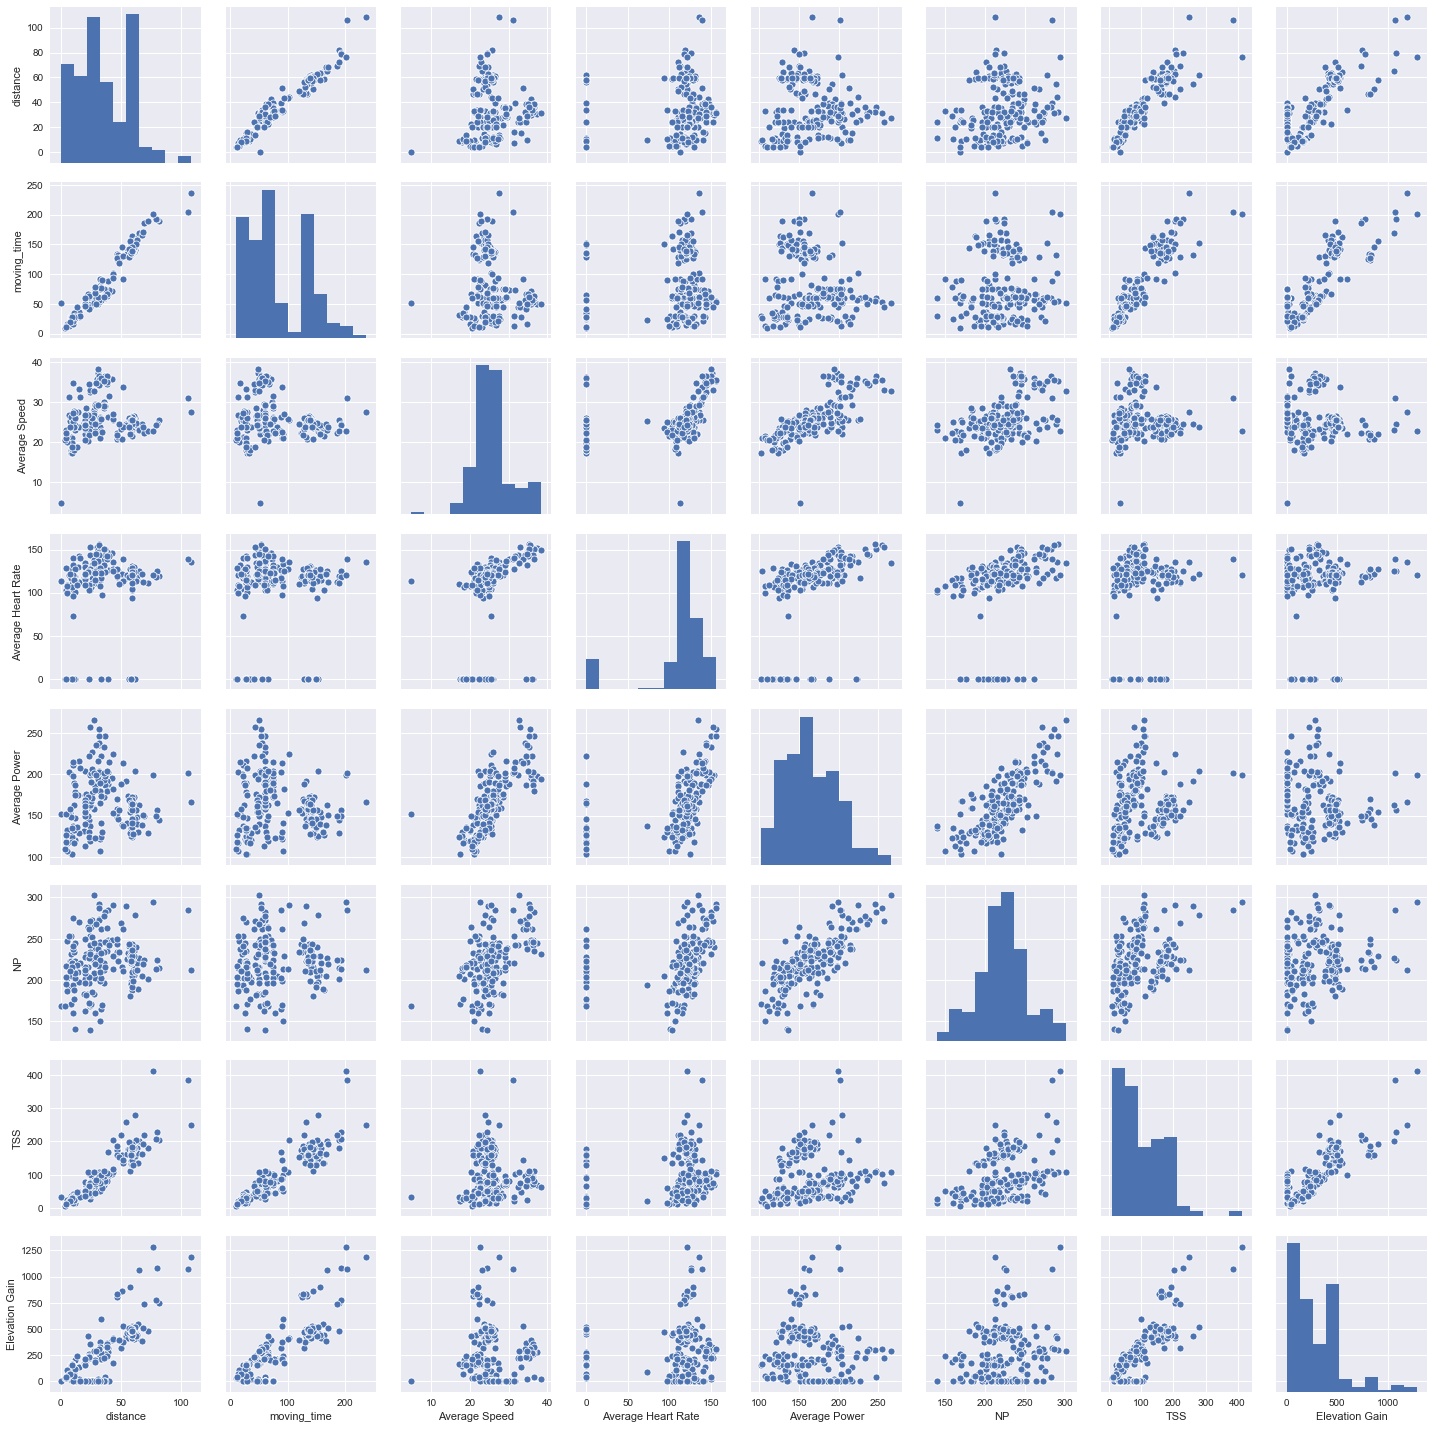

In [17]:
import seaborn as sb

sb.pairplot(strava_joined[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']])

In [18]:
correlate = strava_joined[['distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']].corr()

In [19]:
correlate

,distance,moving_time,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
distance,1.000000,0.972260,0.110461,0.146208,0.030508,0.202935,0.920085,0.804821
moving_time,0.972260,1.000000,-0.100980,0.086295,-0.117486,0.092046,0.909389,0.826645
Average Speed,0.110461,-0.100980,1.000000,0.366373,0.738740,0.507974,0.037499,-0.078419
Average Heart Rate,0.146208,0.086295,0.366373,1.000000,0.406241,0.271764,0.147901,0.037649
Average Power,0.030508,-0.117486,0.738740,0.406241,1.000000,0.761274,0.139968,-0.113476
NP,0.202935,0.092046,0.507974,0.271764,0.761274,1.000000,0.425102,0.228622
TSS,0.920085,0.909389,0.037499,0.147901,0.139968,0.425102,1.000000,0.830574
Elevation Gain,0.804821,0.826645,-0.078419,0.037649,-0.113476,0.228622,0.830574,1.000000


### Annalysizng and summarizing relationships between varialbles that are significant or closer to a value 1 can be as follows:

* TSS to Elevation Gain
* Average Speed to Average Power
* Distance to moving time, TSS and Elevation Gain
* NP to Average Power





We want to explore the differences between the three categories: Race, Workout and Ride.

### * Use scatter plots with different colours for each category to explore how these categories differ.

C:\Users\JPE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\JPE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


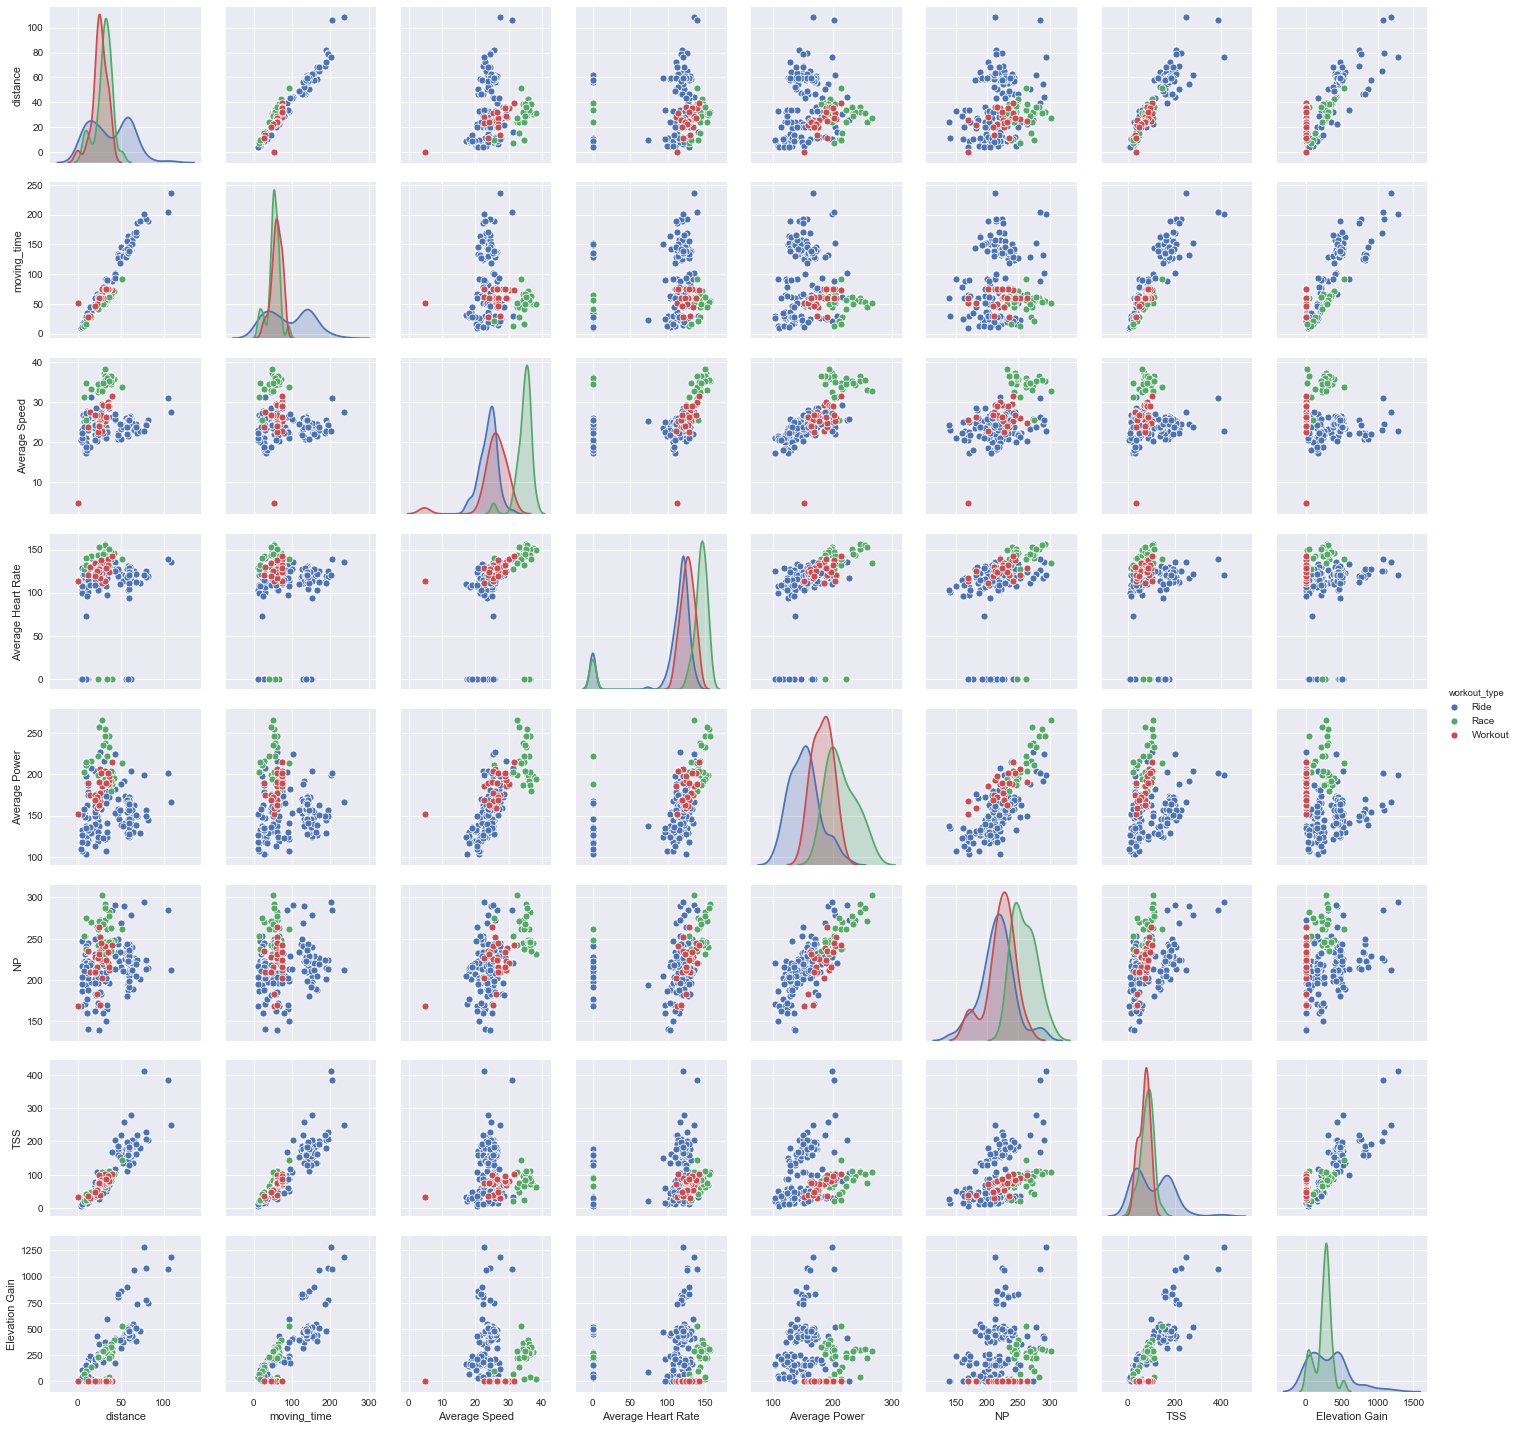

In [20]:
sb.pairplot(strava_joined[['workout_type','distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']], hue='workout_type')


In [21]:
correlate4 = strava_joined[['workout_type','distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']].corr()
correlate4

,distance,moving_time,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
distance,1.000000,0.972260,0.110461,0.146208,0.030508,0.202935,0.920085,0.804821
moving_time,0.972260,1.000000,-0.100980,0.086295,-0.117486,0.092046,0.909389,0.826645
Average Speed,0.110461,-0.100980,1.000000,0.366373,0.738740,0.507974,0.037499,-0.078419
Average Heart Rate,0.146208,0.086295,0.366373,1.000000,0.406241,0.271764,0.147901,0.037649
Average Power,0.030508,-0.117486,0.738740,0.406241,1.000000,0.761274,0.139968,-0.113476
NP,0.202935,0.092046,0.507974,0.271764,0.761274,1.000000,0.425102,0.228622
TSS,0.920085,0.909389,0.037499,0.147901,0.139968,0.425102,1.000000,0.830574
Elevation Gain,0.804821,0.826645,-0.078419,0.037649,-0.113476,0.228622,0.830574,1.000000


The variables relationships with each other can be summarized in two classification as follows:

Ride:
* Distance vs moving time
* Distance vs TSS
* Average Hearrate vs NPP
* Moving Time vs NPP
* Moving Time vs TSS
* Moving Time vs Elevation Guide



Race:
* Distance vs Average Speed
* Distance vs Average Heartrate
* Moving Time vs NPP
* Distance vs NPP
* Moving Time vs Average Heartrate
* Moving Time vs Average Speed


### * Applying box plots in order to represent spread of each variable across the three categories.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A88C1A2400>,
      dtype=object)

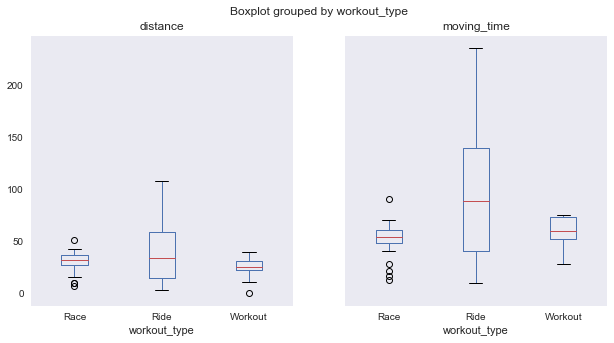

In [22]:
strava_joined.boxplot(by ='workout_type', column =['distance','moving_time'], grid = False, figsize = (10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A88C1FFF60>,
      dtype=object)

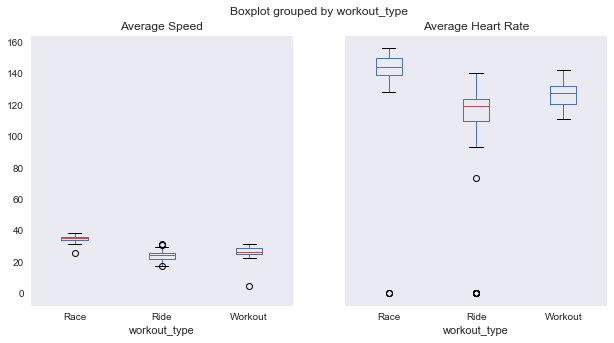

In [23]:
strava_joined.boxplot(by ='workout_type', column =['Average Speed','Average Heart Rate'], grid = False, figsize = (10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A88B9A3DD8>,
      dtype=object)

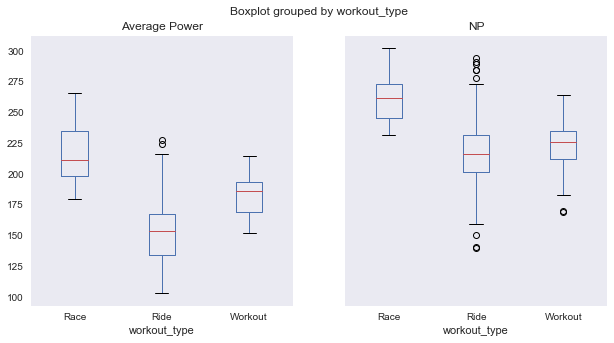

In [24]:
strava_joined.boxplot(by ='workout_type', column =['Average Power','NP'], grid = False, figsize = (10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A88BACABA8>,
      dtype=object)

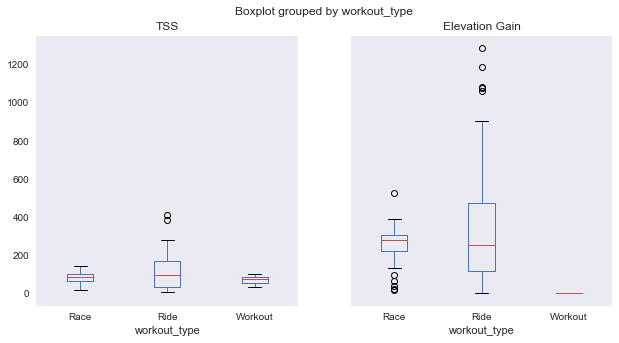

In [25]:
strava_joined.boxplot(by ='workout_type', column =['TSS','Elevation Gain'], grid = False, figsize = (10,5))

### The above analysis shows that there is a strong correlation between distance, moving time, TSS and elevation gain.


## Challenge 1

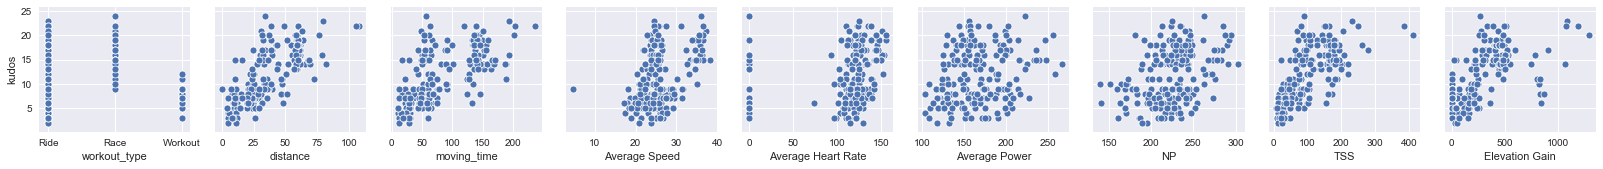

In [26]:
xaxis = ['workout_type','distance','moving_time','Average Speed','Average Heart Rate','Average Power','NP','TSS','Elevation Gain']
yaxis = ['kudos']
sb.pairplot(strava_joined, x_vars = xaxis, y_vars = yaxis, kind = 'scatter')